In [1]:
from __future__ import annotations
from typing import Generator, NewType, Any
from pipeline_1 import *
from pipeline_2 import *
import warnings
warnings.filterwarnings(action= 'ignore')


# Typing Scripts
_path = NewType('_path', Any)
_text = NewType('_text', Any)
_imputer = NewType('_imputer', Any)

In [2]:
kidney: object = KidneyDataset(path= 'C:\\Users\\Lenovo\\OneDrive\\Desktop\\_Kidney\\kidney_disease.csv')
kidney.dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
if __name__.__contains__('__main__'):
    kidney.dataset: pd.DataFrame    = KidneyAnalysis.rename_columns(dataset= kidney.dataset)
    data_characteristics: Generator = KidneyAnalysis.data_characteristics(dataset= kidney.dataset,
                                                                          info= True,
                                                                          summary= True)
    while True:
        try:
            print('-'*100)
            print(data_characteristics.__next__())
        except StopIteration: break 


----------------------------------------------------------------------------------------------------
Dataset Shape: (400, 26)
----------------------------------------------------------------------------------------------------
Dataset features: ['id' 'age' 'blood_pressure' 'specific_gravity' 'albumin' 'sugar'
 'red_blood_cells' 'pus_cell' 'pus_cell_clumps' 'bacteria'
 'blood_glucose_random' 'blood_urea' 'serum_creatinine' 'sodium'
 'potassium' 'hemoglobin' 'packed_cell_volume' 'white_blood_cell_count'
 'red_blood_cell_count' 'hypertension' 'diabetes_mellitus'
 'coronary_artery_disease' 'appetite' 'pedal_edema' 'anemia'
 'classification']
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-nu

In [4]:
target_count: Generator = KidneyAnalysis.target_classification_count(kidney.dataset, 'classification')
while True:
    try:
        print('-'*100)
        print(target_count.__next__())
    except StopIteration: break

----------------------------------------------------------------------------------------------------
Total count of the Prediction column :
ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64
----------------------------------------------------------------------------------------------------


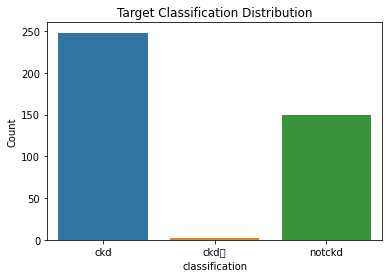

In [5]:
KidneyAnalysis.target_distribution(dataset= kidney.dataset, target= 'classification')

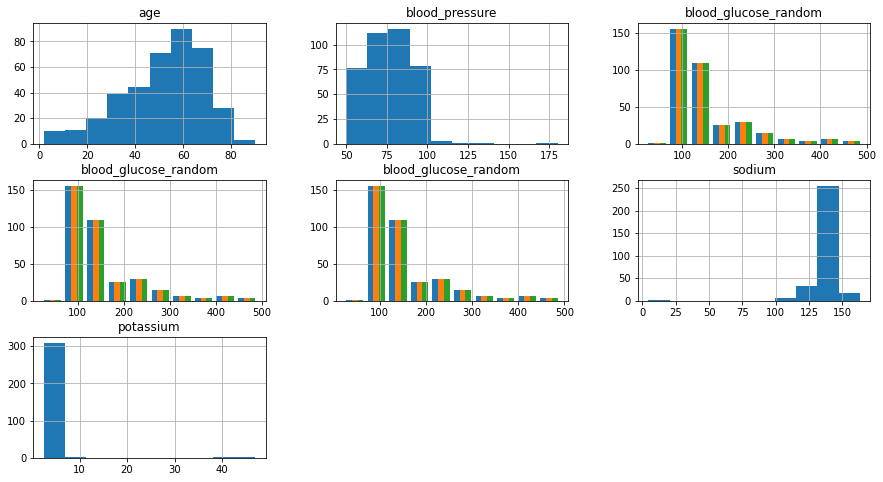

In [6]:
KidneyAnalysis.histograms_numeric_features(dataset= kidney.dataset, 
                                          numeric_features= [
                                              'age','blood_pressure', 'blood_glucose_random',                                                              'blood_glucose_random', 'blood_glucose_random', 
                                              'sodium', 'potassium', 'packed_cell_volume', 
                                              'packed_cell_volume', 'red_blood_cell_count'
                                          ])

In [7]:
kidney.dataset: pd.DataFrame = KidneyPreprocess.replace_values(dataset= kidney.dataset)

kidney.dataset: pd.DataFrame = KidneyPreprocess.change_object_to_str(
    dataset= kidney.dataset,                                                                                     cols= ['red_blood_cells', 'pus_cell', 'pus_cell_clumps',                                                            'bacteria', 'hypertension', 'diabetes_mellitus',
           'coronary_artery_disease', 'pedal_edema', 'anemia', 'appetite']
)
kidney.dataset

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,nan,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,nan,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
kidney.dataset: pd.DataFrame = KidneyPreprocess.encode_features(dataset= kidney.dataset)
kidney.dataset

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,nan,1,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,nan,1,0,0,...,38,6000,NaN,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31,7500,NaN,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35,7300,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47,6700,4.9,0,0,0,1,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54,7800,6.2,0,0,0,1,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49,6600,5.4,0,0,0,1,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51,7200,5.9,0,0,0,1,0,0,0


In [9]:
X, y = KidneyPreprocess.impute_nan_values(dataset= kidney.dataset, 
                                          target= 'classification')
print(y)
X: pd.DataFrame = X.drop('id', axis= 1)
X

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64


,hypertension,blood_glucose_random,age,pedal_edema,bacteria,hemoglobin,specific_gravity,anemia,pus_cell,packed_cell_volume,...,red_blood_cell_count,pus_cell_clumps,blood_pressure,red_blood_cells,potassium,blood_urea,sodium,appetite,coronary_artery_disease,diabetes_mellitus
0,1.0,121.0,48.0,0.0,0.0,15.4,1.020,0.0,1.0,44.0,...,5.20,0.0,80.0,0.2,3.96,36.0,131.6,1.0,0.0,1.0
1,0.0,180.8,7.0,0.0,0.0,11.3,1.020,0.0,1.0,38.0,...,3.58,0.0,50.0,0.4,4.00,18.0,129.4,1.0,0.0,0.0
2,0.0,423.0,62.0,0.0,0.0,9.6,1.010,1.0,1.0,31.0,...,3.56,0.0,80.0,1.0,4.50,53.0,134.2,0.0,0.0,1.0
3,1.0,117.0,48.0,1.0,0.0,11.2,1.005,1.0,0.0,32.0,...,3.90,1.0,70.0,1.0,2.50,56.0,111.0,0.0,0.0,0.0
4,0.0,106.0,51.0,0.0,0.0,11.6,1.010,0.0,1.0,35.0,...,4.60,0.0,80.0,1.0,3.82,26.0,129.8,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,140.0,55.0,0.0,0.0,15.7,1.020,0.0,1.0,47.0,...,4.90,0.0,80.0,1.0,4.90,49.0,150.0,1.0,0.0,0.0
396,0.0,75.0,42.0,0.0,0.0,16.5,1.025,0.0,1.0,54.0,...,6.20,0.0,70.0,1.0,3.50,31.0,141.0,1.0,0.0,0.0
397,0.0,100.0,12.0,0.0,0.0,15.8,1.020,0.0,1.0,49.0,...,5.40,0.0,80.0,1.0,4.40,26.0,137.0,1.0,0.0,0.0
398,0.0,114.0,17.0,0.0,0.0,14.2,1.025,0.0,1.0,51.0,...,5.90,0.0,60.0,1.0,4.90,50.0,135.0,1.0,0.0,0.0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 7)

Tunned Params : {'C': 0.006105402296585327}
Best Score in Training Dataset : 0.925
Accuracy of the Model : 0.9625


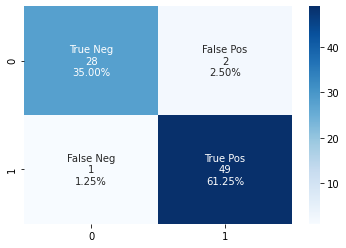

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.96      0.98      0.97        50

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [11]:
logistic_classifier: Generator = Traditional_Models.LogisticRegression(x_train, y_train, x_test, y_test)
accuracies: list[float] = []
while True:
    try:
        item = logistic_classifier.__next__()
        if isinstance(item, dict):
            accuracies.append(item['Accuracy'])
        else:
            print(item)
    except StopIteration: break

Tunned Params : {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score in Training Dataset : 0.765625
Accuracy of the Model : 0.8125


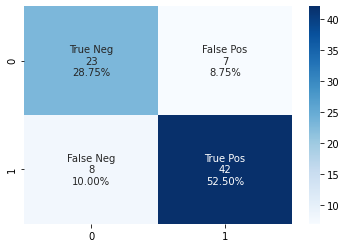

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.86      0.84      0.85        50

    accuracy                           0.81        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.81      0.81      0.81        80



In [12]:
support_vector_machines: Generator = Traditional_Models.SupportVectorMachines(x_train, 
                                                                              y_train, 
                                                                              x_test, 
                                                                              y_test)
while True:
    try:
        item = support_vector_machines.__next__()
        if isinstance(item, dict):
            accuracies.append(item['Accuracy'])
        else:
            print(item)
    except StopIteration: break

Tunned Params : {'min_samples_split': 30, 'max_leaf_nodes': 32, 'max_features': 0.2, 'max_depth': 8, 'criterion': 'gini', 'class_weight': {0: 1, 1: 3}}
Best Score in Training Dataset : 0.9949367088607595
Accuracy of the Model : 1.0


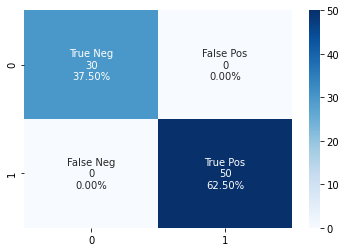

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [13]:
decision_trees: Generator = Traditional_Models.DecisionTrees(x_train, y_train, 
                                                             x_test, y_test)
while True:
    try:
        item = decision_trees.__next__()
        if isinstance(item, dict):
            accuracies.append(item['Accuracy'])
        else:
            print(item)
    except StopIteration: break

Tunned Params : {'n_estimators': 228, 'min_samples_split': 55, 'min_samples_leaf': 8, 'max_leaf_nodes': 22, 'max_depth': 14}
Best Score in Training Dataset : 0.9974683544303797
Accuracy of the Model : 1.0


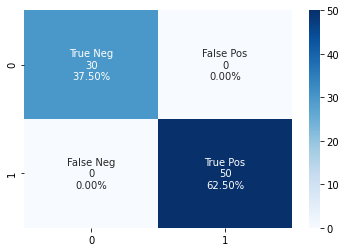

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [15]:
random_forest: Generator = Traditional_Models.RandomForest(x_train, y_train, 
                                                           x_test, y_test)
while True:
    try:
        item = random_forest.__next__()
        if isinstance(item, dict):
            accuracies.append(item['Accuracy'])
        else:
            print(item)
    except StopIteration: break

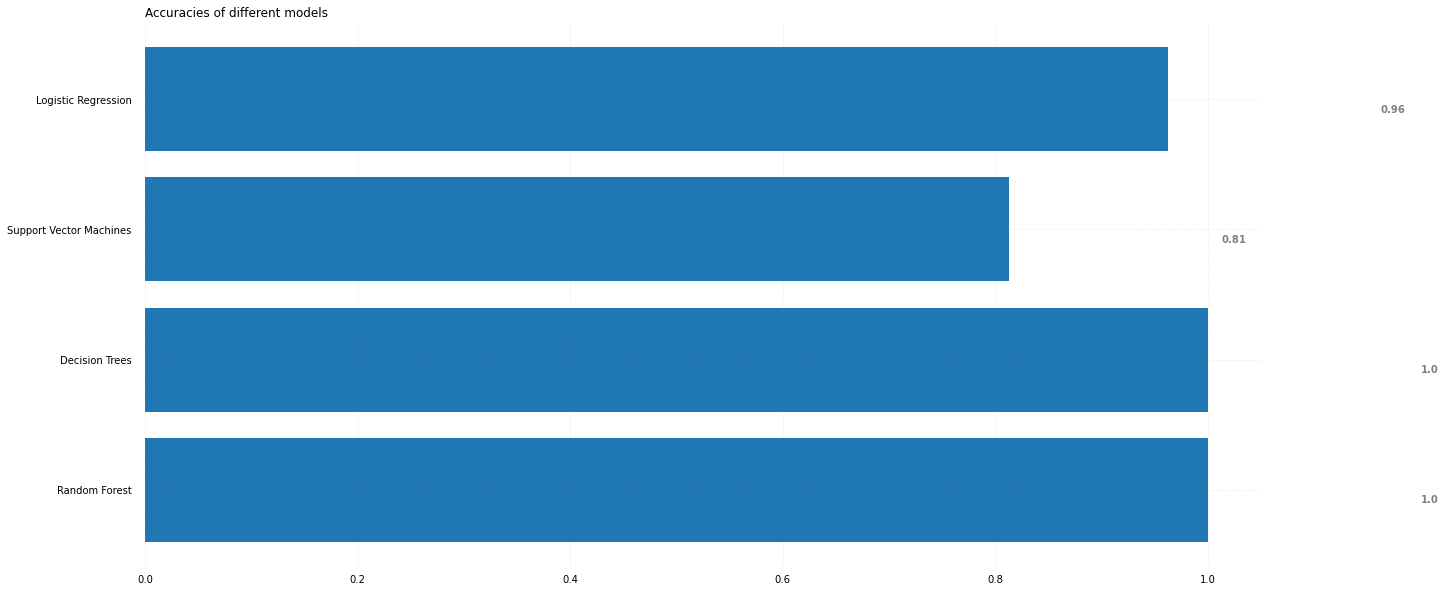

In [25]:
model_list: list[str] = ['Logistic Regression', 'Support Vector Machines', 'Decision Trees', 'Random Forest']

def model_accuracies_plot(model: list[str], accuracies: list[float]) -> _plot:
    fig, ax = plt.subplots(figsize= (20, 10))
    ax.barh(model, accuracies)
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10)  
        
    ax.grid(b = True, 
            color ='grey', 
            linestyle ='-.', 
            linewidth = 0.5, 
            alpha = 0.2) 
 
    ax.invert_yaxis() 

    for i in ax.patches: 
        plt.text(
            i.get_width()+0.2, 
            i.get_y()+0.5, 
            str(round((i.get_width()), 2)), 
            fontsize = 10, 
            fontweight ='bold', 
            color ='grey'
        ) 

    ax.set_title('Accuracies of different models', 
                      loc ='left') 
    plt.show()


model_accuracies_plot(model_list, accuracies) 